In [6]:
from IPython.display import Image

# Protostellar Evolution

1. Timescales (Kelvin-Helmholtz vs others)
2. Protostellar Structure & Boundary Conditions
3. Deuterium Burning
4. Phases of protostellar evolution

## The Kelvin-Helmholtz timescale

The Kelvin-Helmholtz timescale is the time required to radiate away a star's gravitational energy.

From dimensional analysis, we have:
\begin{equation}
 t_{KH} = \frac{\mathcal{W}}{L}
\end{equation}
where $\mathcal{W}$ is the gravitational energy and $L$ is the star's luminosity.

The gravitational energy is:
\begin{equation}
\mathcal{W} \approx \frac{G M_*^2}{R_*}
\end{equation}
i.e., it is the work done by gas falling from infinity to the star's surface.

For a sun-like star, this is:

\begin{equation}
 t_{KH} = \frac{G M_\odot^2}{R_\odot L_\odot} = 3\times10^{7} \mathrm{yr}
\end{equation}

In [15]:
t_kh = (constants.G * u.M_sun**2 / (u.R_sun * u.L_sun)).to(u.Myr)
t_kh

<Quantity 31.39927676 Myr>

However, for a protostar, the radius and luminosity are both larger, so a reasonable approximation is instead 
\begin{equation}
 t_{KH} = \frac{G M_\odot^2}{10 R_\odot 10 L_\odot} = 3\times10^{5} \mathrm{yr}
\end{equation}

The sound-crossing time is the time require for a pressure wave to cross a star.  It is short, much shorter than $t_{KH}$.

It can be approximated as $t_s = R_* / c_s$, where, if we assume the star is in equilibrium between gas pressure and gravity, we can approximate $c_s = \sqrt{GM/R}$, so:
\begin{equation}
t_s = \sqrt{\frac{R^3}{GM}} = 14 \mathrm{h} << t_{kh}
\end{equation}

In [16]:
sound_crossing_time = ((10*u.R_sun)**(3/2) / (constants.G * u.M_sun)**(1/2)).to(u.hour)
sound_crossing_time

<Quantity 13.99183539 h>

## Interactive questions

What is the Kelvin-Helmholtz timescale for a brown dwarf (assume $M=0.05 \mathrm{M}_\odot$, $R= 1 \mathrm{R}_\odot$, and $L=4 \pi R^2 T^4 \sigma_{SB}$ with $T=500$ K)?

What about for an O-star ($M=50 \mathrm{M}_\odot$, $R=20 \mathrm{R}_\odot$, $T=30,000$ K)?

In [17]:
tkh_bd = (constants.G * (0.05*u.M_sun)**2 / (1 * u.R_sun * (4*np.pi*(1*u.R_sun)**2*constants.sigma_sb*(500*u.K)**4))).to(u.Myr)
tkh_bd

<Quantity 1394.07441848 Myr>

In [18]:
tkh_o= (constants.G * (50*u.M_sun)**2 / (20 * u.R_sun * (4*np.pi*(20*u.R_sun)**2*constants.sigma_sb*(30000*u.K)**4))).to(u.Myr)
tkh_o

<Quantity 0.01344593 Myr>

Timescale summary
* Protostars are in hydrostatic equilibrium
* They can be modeled as slowly changing from one equilibrium state to another
* $t_{KH} > t_{acc} >> t_s$ for solar-mass stars

# Protostellar Structure

We're going to skip the detailed equations of stellar structure.  They're covered in 17.1.2 of Krumholz.  We'll skip to the questions of what is different between stars and protostars

## Boundary conditions

The key difference between stars & protostars is the difference in boundary conditions, specifically, that protostars are accreting.

The accretion rate is:
\begin{equation}
\dot{M} = 4\pi r^2 \rho_i v
\end{equation}

The resulting _ram pressure_ $P = \rho_i v_{infall}^2$ at the surface is
\begin{equation}
P(M) = \rho_i v^2 = \frac{\dot{M} v}{4\pi r^2}
\end{equation}


If the incoming gas is in free-fall, then we can set $v = v_{\rm ff} = \sqrt{2GM/R}$, which gives
\begin{equation}
\label{pbound1}
P(M) = \frac{\dot{M}}{4\pi} \sqrt{\frac{2 G M}{R^5}},
\end{equation}
where $M$ is the total stellar mass. 


For a non-accreting star, we have the luminosity
\begin{equation}
L(M) = L_{bb} =4\pi R^2 \sigma_{\rm SB} T(M)^4
\end{equation}



while for an accreting star, we have:
\begin{equation}
\label{lbound1}
L(M) = L_{\rm acc} + L_{\rm bb} - L_{\rm in}
\end{equation}

where $L_{in}$ is a term accounting for the energy in the accretion flow that advects to the interior - i.e., that is _not_ radiated away.

Stahler determined that $L_{in} \approx \frac{3}{4} L_{acc}$ for spherical accretion

# Accretion probably isn't spherical

<img src="https://www.annualreviews.org/na101/home/literatum/publisher/ar/journals/content/astro/2016/astro.2015.54.issue-1/annurev-astro-081915-023347/20160906/images/large/aa540135.f1.jpeg">

Consequences of non-spherical accretion:

* The boundary condition becomes more star-like (most of the area of the sphere just looks out into empty space)
* $L_{in} > \frac{3}{4} L_{acc}$ 

* "Hot accretion" is $L_{in} \approx \frac{3}{4} L_{acc}$
* "Cold accretion" is $L_{in} \approx L_{acc}$

These govern the amount of entropy added to the stellar interior, which in turn governs the stellar radius.

## Deuterium Burning

\begin{equation}
^2\mbox{H} + \,^1\mbox{H}\, \rightarrow \, ^3\mbox{He} + \gamma.
\end{equation}

This reaction begins to occur at an appreciable rate once the temperature reaches $10^6$ K, and the reaction releases $5.5$ MeV per deuterium nucleus burned. 

The equation describing the internal energy of the protostar is:
\begin{equation}
\frac{\partial L}{\partial M_r} = \epsilon - T\frac{\partial s}{\partial t}.
\end{equation}
where $L$ is the luminosity, $M_r$ is the Lagrangian mass coordinate (it is monotonically increasing with radius), $s$ is the  entropy, $T$ is temperature, and $t$ is time.

$\epsilon$ is the additional energy supplied by nuclear burning.

For a main-sequence star, the right side is just $\epsilon$ - there is no change in specific entropy with time.  The change in  entropy comes only from accretion.


We can then solve the equations of protostellar structure numerically.

<img src="graphics/krumholzfig17.1.png">

Evolutionary Phases of Protostellar Evolution

1. Initial contraction
2. Deuterium Ignition & Convection
3. Deuterium Exhaustion & Radiative Barrier
4. Swelling
5. Contraction onto Main Sequence


## Initial Contraction ( < 0.2 $M_\odot$)

* only source of energy is gravitational potential energy
* entropy lost through radiation at accretion shock
* hot-mode accretion is self-regulating and converges to a common track:
    * if the star starts small, $v_{ff}$ is large, the shock is hotter, more entropy is added, star grows in radius
    * if the star starts big, $v_{ff}$ is large, the shock is cooler, less entropy is added, star shrinks in radius
* cold-mode accretion: no entropy is added, initial conditions fully determine track

(this is the intial phase in fig 17.1, up to M=0.2 M$_\odot$)

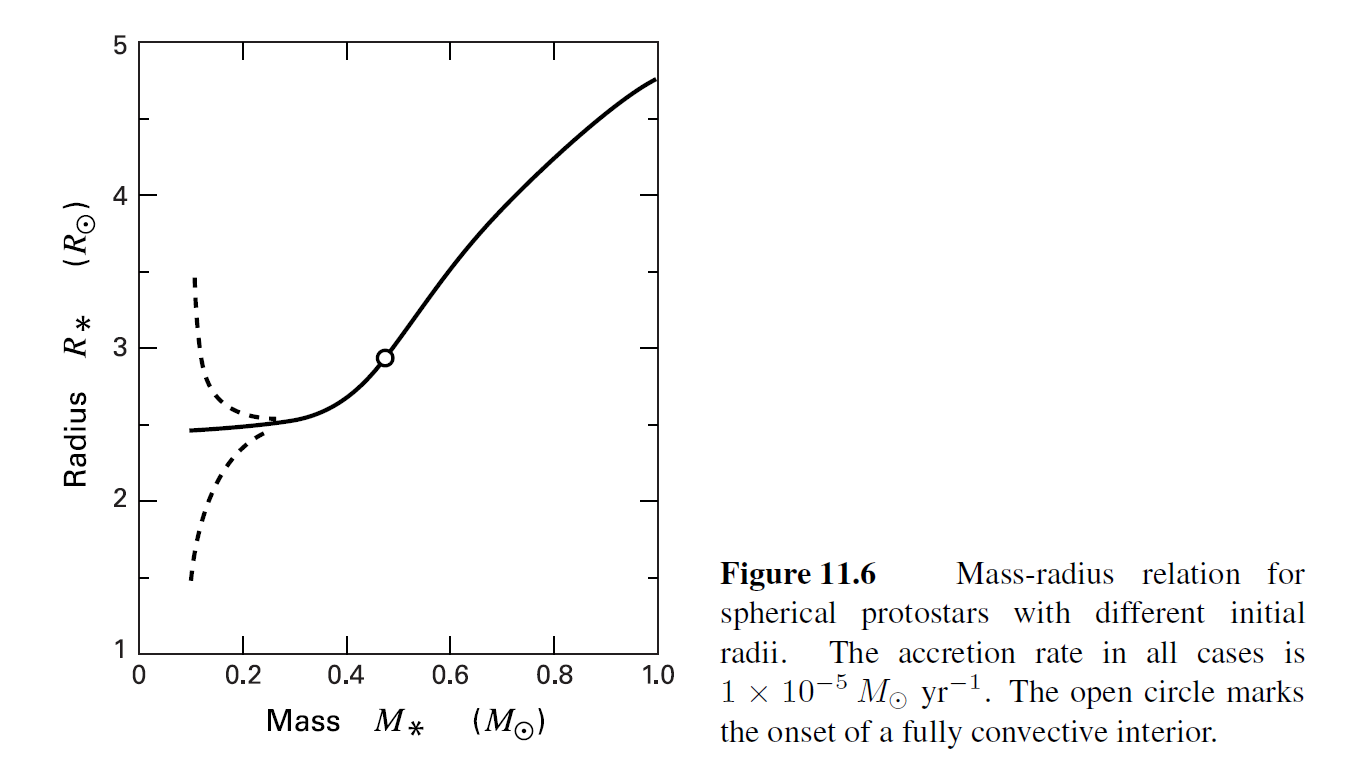

In [7]:
Image('graphics/pallastahler11.6.png')

## Deuterium Ignition & Convection (0.25-0.7 $M_\odot$)

* Protostar grows in mass, $T_c$ increases: larger mass requires higher T to be in hydrostatic equilibrium
* D-burning happens once $T_c$ approachs $\sim10^6$ K.  Rate $\dot{E}\propto T^{11.8}$
* "Thermostat" effect: $T_c$ locks at $\sim10^6$, because any slight increase above that expands the star, adiabatically cooling back down
* Outer radius increases w/mass.  Core contraction halts.
* Convection starts

<img src="graphics/krumholzfig17.1.png" style='max-height: 50%'>

### Convection

Before deuterium burning, there is more entropy $s$ in outer layers than inner layers b/c $v_{infall}$ increases as the mass increases (and the radius is about the same).  $ds/dr > 0$ is stable against convection.



$\epsilon$ is now positive b/c deuterium is burning.  
\begin{equation}
\frac{\partial L}{\partial M_r} = \epsilon - T\frac{\partial s}{\partial t}.
\end{equation}
so the entropy at the center starts to increase.

Convection drags fresh deuterium from outer layers inward to provide a continuous source of fuel.

Convection can start without deuterium burning: high accretion rates can also drive core heating and the entropy inversion requried to start convection.

# Deuterium exhaustion, formation of radiative barrier (0.6-3 $M_\odot$)